----------
**Kaggle Mini-Project I: Exploratory Data Analysis**
=====================================
https://www.kaggle.com/maurerm/kaggleproject-part-3-presentation?scriptVersionId=16893865

Maggie Maurer

CoderGirl, DataScience Cohort

July 2019

----------

- <a href='#1'>1. Introduction</a>  
    - <a href='#1.2'>1.2. Feature Directory</a> 
- <a href='#2'>2. Libraries and Data</a>  
    - <a href='#2.1'>2.1. Loading libraries</a> 
    - <a href='#2.2'>2.2. Reading data</a> 
- <a href='#3'>3. Exploratory Data Analysis (EDA)</a> 
    - <a href='#3.1'>3.1. Shape, Head, Describe</a> 
    - <a href='#3.2'>3.2. Target Distribution</a> 
    - <a href='#3.3'>3.3. Univariate analysis</a> 
    - <a href='#3.4'>3.4 Bivariate analysis (Feature vs Target)</a> 
    - <a href='#3.5'>3.5 Multivariate analysis</a> 
- <a href='#4'>4. Predictive Modeling</a>
    - <a href='#4.1'>4.1. K-Nearest Neighbors</a> 
    - <a href='#4.2'>4.2. Random Forests</a> 
- <a href='#5'>5. Conclusions</a>

# <a id='1'>1. Introduction</a> 
Of all the applications of machine-learning, diagnosing any serious medical disease using a predictive model is going to difficult. If the output of a preditive model is treatment, such as surgery or medication, or even the absence of treatment, people are going to want to know why the model predicted their particular course of action.

This dataset gives 13 features along with a target condition (the presence or absence of Heart Disease). Below, the data is explored using K-Nearest Neighbors and then investigated using Machiene Learning explainability tools and techniques.

This dataset was created by the following:
* Hungarian Institute of Cardiology, Budapest: Andras Janosi, M.D. 
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation, Robert Detrano, M.D., Ph.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

## <a id='1.1'>1.1. Feature Directory</a> 
It's a fairly simple dataset to understand set of data. However, due to the numeric qualifiers given to the categorical data, what the values mean is not obvious. 

1.  age: The person's age in years
2.  sex: Provider-identified gender 
    * 0 = Female
    * 1 = Male
3. cpain: The type of chest pain experienced
   * 0: Asymptomatic Pain
   * 1: Typical Angina Pain
   * 2: Atypical Angina Pain
   * 3: Non-Angina Pain
4. resting_BP: Resting Systolic Blood Pressure (mm Hg) upon Hospital Admission
5. chol: Serum Cholesterol (mg/dl)
6. fasting_BS: Fasting Blood Sugar (mmol/L)
   * 0: Lower than 120 mmol/L
   * 1: Greater than 120 mmol/L
7. resting_EKG: Resting EKG Results
   * 0: Normal EKG results
   * 1: Showing probable or definite left ventricular hypertrophy by Estes' criteria
   * 2: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. max_HR: Maximum Heart Rate Achieved (bpm)
9. 'exercise_ANG': Exercise Induced Angina (EIA)
   * 0: No, they did not experience EIA
   * 1: Yes, they experienced EIA
10. ST_depression: ST Depression (mm) Induced by Exercise Relative to Rest
11. ST_depressionAB: ST Depression Abnormalitiles
    * 0: Normal-> The pts ST depression was 0
    * 1: Abnormal-> The pts ST depression greater than 0
    * This is a engineered feature.  If you would like to see how or why I engineered it, please examine [Part 1](https://www.kaggle.com/maurerm/kaggleproject-part-1-exploratory-data-analysis) of this Kaggle Assignment.
12. m_exercise_ST: The Slope of the Peak Exercise ST Segment
    * 0: Upsloping
    * 1: Flat
    * 2: Downsloping
13. no_maj_vessels: Number of Major Vessels (0-3) Colored by Flourosopy
    * Either 0, 1, 2, 3, or 4
13. thal: Thalium Stress Test Result Results
    * 1: Fixed defect
    * 2: Normal
    * 3: Reversible defect
14. target': Absence or Presence of Heart Disease
   * 0: no heart disease
   * 1: heart disease present

# <a id='1'>1. Librairies and Data</a> 
## <a id='#1.1'>1.1. Loding Libraries</a> 

In [350]:
#Data Analysis Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import statistics as st
from scipy import stats
from scipy import interp
import statistics as st
import math
import os
from datetime import datetime
import itertools

#Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
from IPython.display import display
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
%matplotlib inline
from IPython.core.display import HTML
from pdpbox import pdp, info_plots
import shap
shap.initjs()
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

#sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score,confusion_matrix, classification_report, confusion_matrix, jaccard_similarity_score, f1_score, fbeta_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Imputer,MinMaxScaler, LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score, validation_curve, RandomizedSearchCV, cross_val_predict, StratifiedKFold

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

from sklearn import datasets

#misc
from functools import singledispatch
import eli5
from eli5.sklearn import PermutationImportance
import shap
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("../input"))
from xgboost import XGBClassifier
import lightgbm as lgb
import warnings


['heart.csv']


## <a id='1.2'>1.2. Reading data</a> 

In [351]:
heart = pd.read_csv("../input/heart.csv")

Change DataFrame to match preprocessing changes made in [Part 1](https://www.kaggle.com/maurerm/kaggleproject-part-1-exploratory-data-analysis) of this Kaggle Assignment.

In [352]:
heart2= heart.drop(heart.index[164])
heart2.columns=['age', 'sex', 'cpain','resting_BP', 'chol', 'fasting_BS', 'resting_EKG', 
                'max_HR', 'exercise_ANG', 'ST_depression', 'm_exercise_ST', 'no_maj_vessels', 'thal', 'target']

heart2['chol']=heart2['chol'].replace([417, 564], 240)
heart2['chol']=heart2['chol'].replace([407, 409], 249)

heart2['ST_depressionAB']=heart2['ST_depression'].apply(lambda row: 1 if row > 0 else 0)
heart2A=heart2.iloc[:,0:11]
heart2B=heart2.iloc[:,11:14]
heart2C=heart2.loc[:,'ST_depressionAB']
heart2C=pd.DataFrame(heart2C)
heart2C.head()
heart2 = pd.concat([heart2A, heart2C, heart2B], axis=1, join_axes=[heart2A.index])

heart2.loc[48, 'thal']=2.0
heart2.loc[281, 'thal']=3.0

PHD=heart2.loc[heart2.loc[:,'target']==1]
AHD=heart2.loc[heart2.loc[:,'target']==0]
heart2.head()

,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,ST_depressionAB,no_maj_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0,2.0,1


To make the dataset a little more intuiative, I made a second dataset, heart3, where the numeric descriptors have been changed to words.  This will improve interpretation later on.

In [353]:
#heart3 (descriptive)
heart3=pd.DataFrame.copy(heart2)

heart3['sex']=heart3['sex'].replace([1, 0], ['Male', 'Female'])
heart3['cpain']=heart3['cpain'].replace([0, 1, 2, 3], ['Asymptomatic', 'Typical Angina', 'Atypical Angina', 'Non-Angina'])
heart3['fasting_BS']=heart3['fasting_BS'].replace([1, 0], ['BS > 120 mg/dl', 'BS < 120 mg/dl'])
heart3['resting_EKG']=heart3['resting_EKG'].replace([0, 1, 2], ['Normal', 'Left Ventricular Hypertrophy', 'ST-T Wave Abnormality'])
heart3['exercise_ANG']=heart3['exercise_ANG'].replace([0, 1], ['Absent', 'Present'])
heart3['m_exercise_ST']=heart3['m_exercise_ST'].replace([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
heart3['thal']=heart3['thal'].replace([1, 2, 3], ['Fixed Defect', 'Normal', 'Reversible Defect'])
heart3['target']=heart3['target'].replace([0, 1], ['Absent', 'Present'])

heart3['chol']=heart3['chol'].replace([417, 564], 240)
heart3['chol']=heart3['chol'].replace([407, 409], 249)

heart3.loc[48, 'thal']="Normal"
heart3.loc[281, 'thal']="Reversible Defect"

PHD3=heart3.loc[heart3.loc[:,'target']=="Present"]
AHD3=heart3.loc[heart3.loc[:,'target']=="Absent"]
heart3.head()


,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,ST_depressionAB,no_maj_vessels,thal,target
0,63,Male,Non-Angina,145,233,BS > 120 mg/dl,Normal,150,Absent,2.3,Upsloping,1,0,Fixed Defect,Present
1,37,Male,Atypical Angina,130,250,BS < 120 mg/dl,Left Ventricular Hypertrophy,187,Absent,3.5,Upsloping,1,0,Normal,Present
2,41,Female,Typical Angina,130,204,BS < 120 mg/dl,Normal,172,Absent,1.4,Downsloping,1,0,Normal,Present
3,56,Male,Typical Angina,120,236,BS < 120 mg/dl,Left Ventricular Hypertrophy,178,Absent,0.8,Downsloping,1,0,Normal,Present
4,57,Female,Asymptomatic,120,354,BS < 120 mg/dl,Left Ventricular Hypertrophy,163,Present,0.6,Downsloping,1,0,Normal,Present


# <a id='2'>2. Exploratory Data Analysis (EDA)</a>  
## <a id='2.1'>2.1. Shape, Head, Describe</a> 

In [354]:
numrows= heart3.shape[0]
numcolumns=heart3.shape[1]
display(heart3.head(5), heart3.describe(), print("Number of Rows:", numrows),print("Number of Columns:", numcolumns))

Number of Rows: 302
Number of Columns: 15


,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,ST_depressionAB,no_maj_vessels,thal,target
0,63,Male,Non-Angina,145,233,BS > 120 mg/dl,Normal,150,Absent,2.3,Upsloping,1,0,Fixed Defect,Present
1,37,Male,Atypical Angina,130,250,BS < 120 mg/dl,Left Ventricular Hypertrophy,187,Absent,3.5,Upsloping,1,0,Normal,Present
2,41,Female,Typical Angina,130,204,BS < 120 mg/dl,Normal,172,Absent,1.4,Downsloping,1,0,Normal,Present
3,56,Male,Typical Angina,120,236,BS < 120 mg/dl,Left Ventricular Hypertrophy,178,Absent,0.8,Downsloping,1,0,Normal,Present
4,57,Female,Asymptomatic,120,354,BS < 120 mg/dl,Left Ventricular Hypertrophy,163,Present,0.6,Downsloping,1,0,Normal,Present


,age,resting_BP,chol,max_HR,ST_depression,ST_depressionAB,no_maj_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,243.788079,149.569536,1.043046,0.675497,0.718543
std,9.04797,17.563394,45.459574,22.903527,1.161452,0.468966,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.000000,152.500000,0.800000,1.000000,0.000000
75%,61.00000,140.000000,273.000000,166.000000,1.600000,1.000000,1.000000
max,77.00000,200.000000,394.000000,202.000000,6.200000,1.000000,4.000000


None

None

## <a id='2.2'>2.2. Target Distribution</a> 

Text(0.5, 0, 'HD Diagnosis')

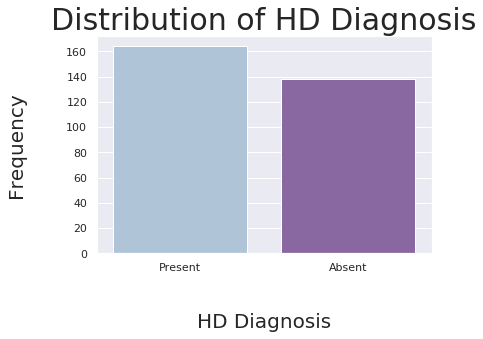

In [355]:
ax1 = sns.countplot(heart3['target'], palette="BuPu")
plt.title("Distribution of HD Diagnosis", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("HD Diagnosis", labelpad=40, size=20)

## <a id='2.3'>2.3. Univariate analysis</a> 

### <a id=''>Numerical data</a> 

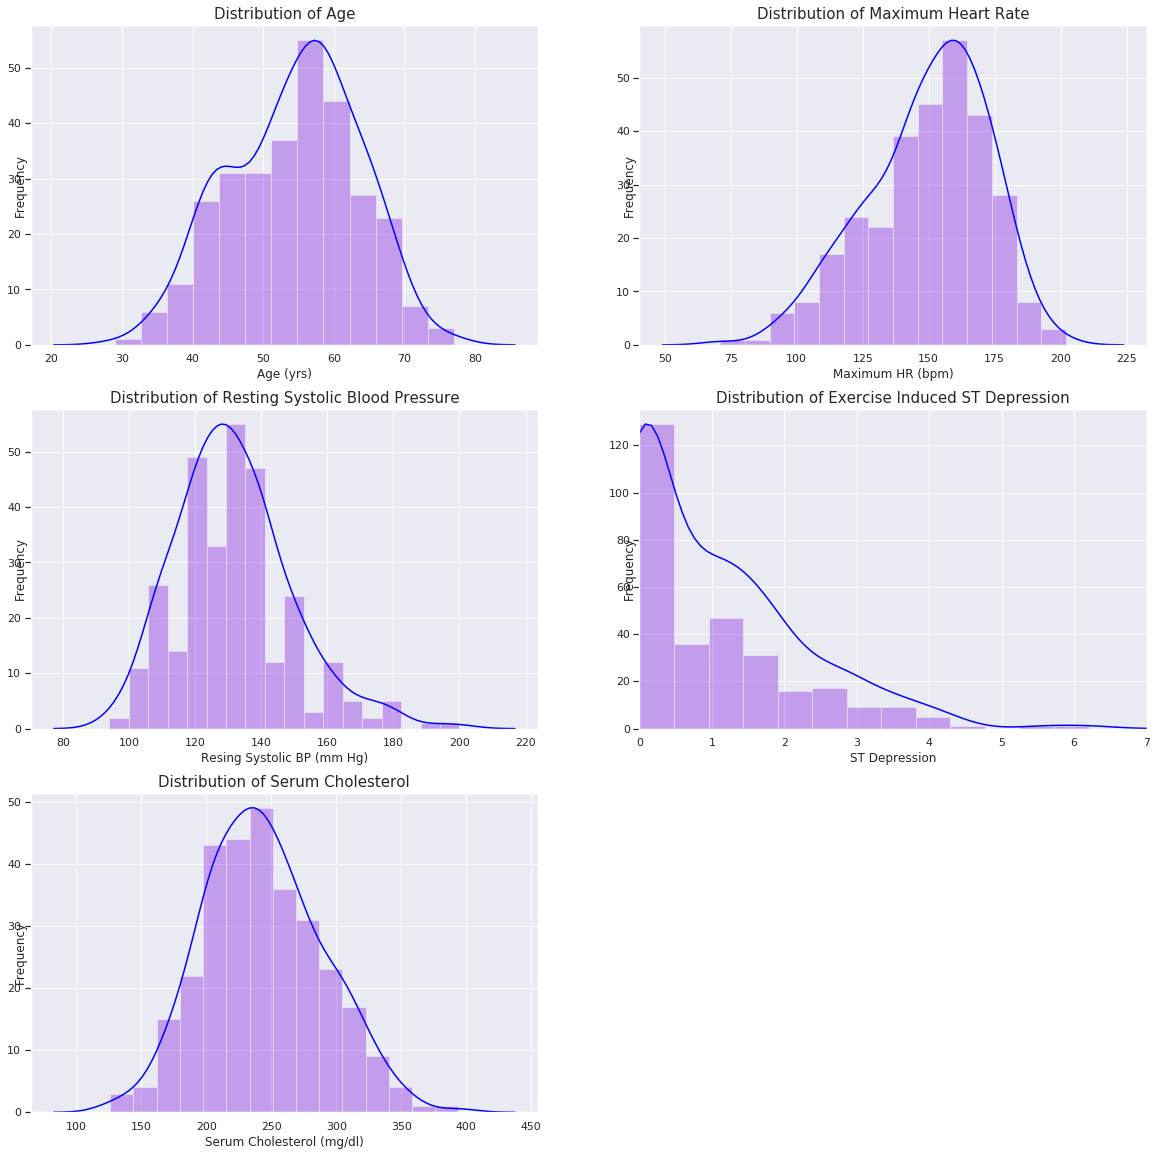

In [356]:
fig = plt.figure(figsize=(20,20))


plt.subplot(3, 2, 1)
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['age'], kde=False, color='blueviolet')
ax1.set_xlabel("Age (yrs)")
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['age'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Age", size=15)
plt.ylabel("Frequency")

plt.subplot(3, 2, 2)
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['max_HR'], kde=False, color='blueviolet')
ax1.set_xlabel("Maximum HR (bpm)")
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['max_HR'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Maximum Heart Rate", size=15)
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['resting_BP'], kde=False, color='blueviolet')
ax1.set_xlabel("Resing Systolic BP (mm Hg)")
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['resting_BP'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Resting Systolic Blood Pressure", size=15)
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['ST_depression'], kde=False, color='blueviolet')
ax1.set_xlabel("ST Depression")
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['ST_depression'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Exercise Induced ST Depression", size=15)
plt.ylabel("Frequency")
plt.xlim(0,7)

plt.subplot(3, 2, 5)
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['chol'], kde=False, color='blueviolet')
ax1.set_xlabel("Serum Cholesterol (mg/dl)")
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['chol'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Serum Cholesterol",size=15)
plt.ylabel("Frequency")

plt.show()



### <a id=''>Categorical data</a> 

Text(0.5, 0, 'Results')

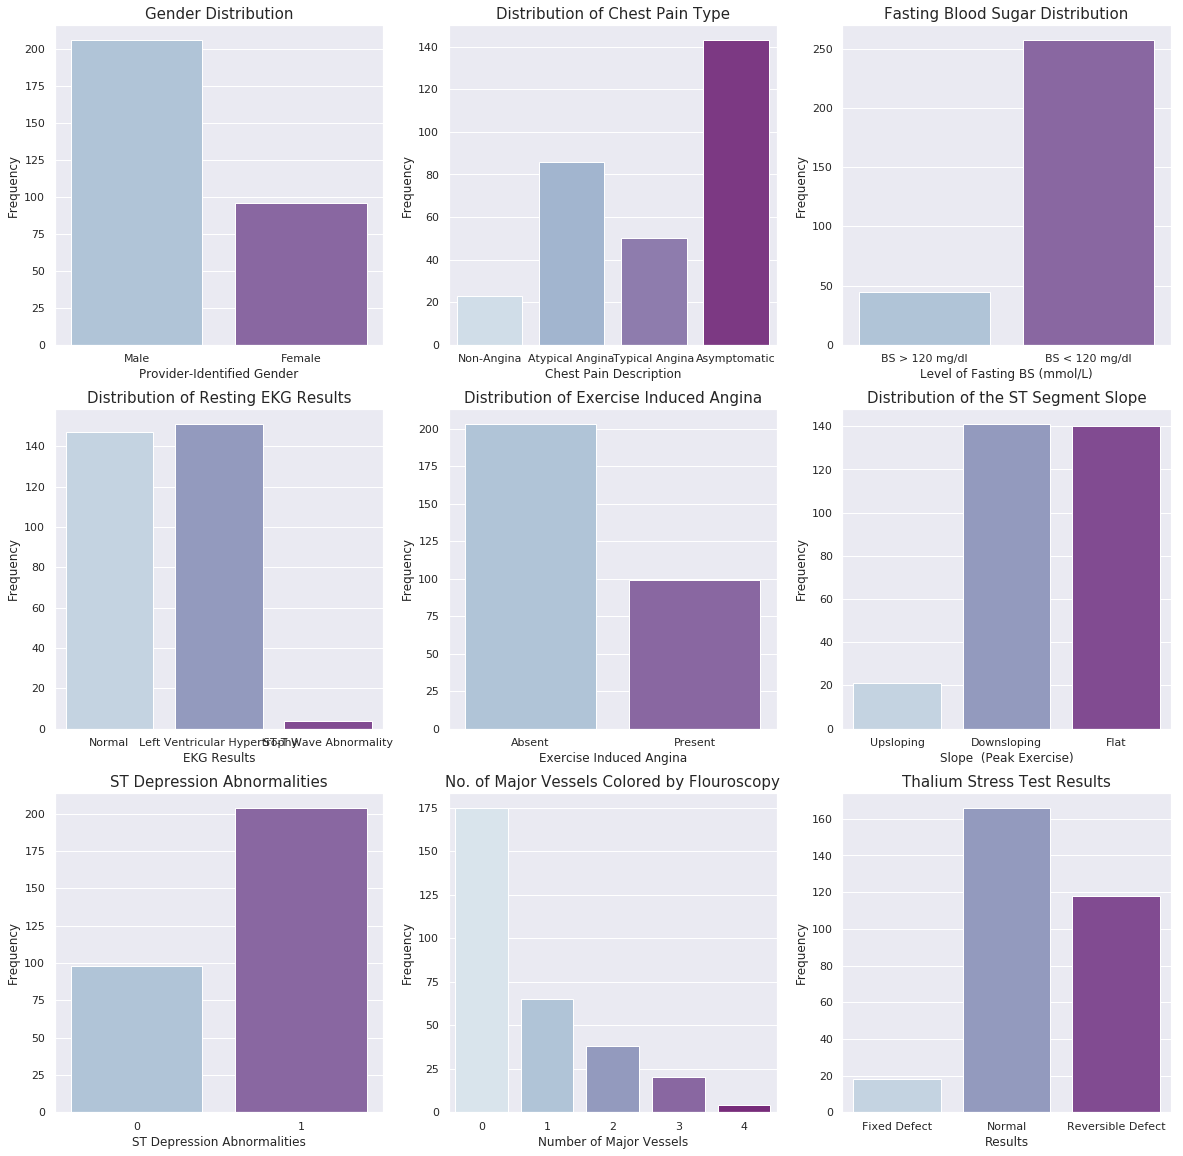

In [357]:
fig = plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.countplot(heart3['sex'], palette="BuPu")
plt.title("Gender Distribution", size=15)
plt.ylabel("Frequency")
plt.xlabel("Provider-Identified Gender")

plt.subplot(3, 3, 2)
sns.countplot(heart3['cpain'], palette="BuPu")
plt.title("Distribution of Chest Pain Type", size=15)
plt.ylabel("Frequency")
plt.xlabel("Chest Pain Description")

plt.subplot(3, 3, 3)
sns.countplot(heart3['fasting_BS'], palette="BuPu")
plt.title("Fasting Blood Sugar Distribution", size=15)
plt.ylabel("Frequency")
plt.xlabel("Level of Fasting BS (mmol/L)")

plt.subplot(3, 3, 4)
sns.countplot(heart3['resting_EKG'], palette="BuPu")
plt.title("Distribution of Resting EKG Results", size=15)
plt.ylabel("Frequency")
plt.xlabel("EKG Results")

plt.subplot(3, 3, 5)
sns.countplot(heart3['exercise_ANG'], palette="BuPu")
plt.title("Distribution of Exercise Induced Angina", size=15)
plt.ylabel("Frequency")
plt.xlabel("Exercise Induced Angina")

plt.subplot(3, 3, 6)
sns.countplot(heart3['m_exercise_ST'], palette="BuPu")
plt.title("Distribution of the ST Segment Slope", size=15)
plt.ylabel("Frequency")
plt.xlabel("Slope  (Peak Exercise)")

plt.subplot(3, 3, 7)
sns.countplot(heart3['ST_depressionAB'], palette="BuPu")
plt.title("ST Depression Abnormalities", size=15)
plt.ylabel("Frequency")
plt.xlabel("ST Depression Abnormalities")

plt.subplot(3, 3, 8)
sns.countplot(heart3['no_maj_vessels'], palette="BuPu")
plt.title("No. of Major Vessels Colored by Flouroscopy", size=15)
plt.ylabel("Frequency")
plt.xlabel("Number of Major Vessels")

plt.subplot(3, 3, 9)
sns.countplot(heart3['thal'], palette="BuPu")
plt.title("Thalium Stress Test Results", size=15)
plt.ylabel("Frequency")
plt.xlabel("Results")

## <a id='2.4'>2.4. Bivariate analysis (Feature vs Target)</a>

### <a id=''>Correlation</a>

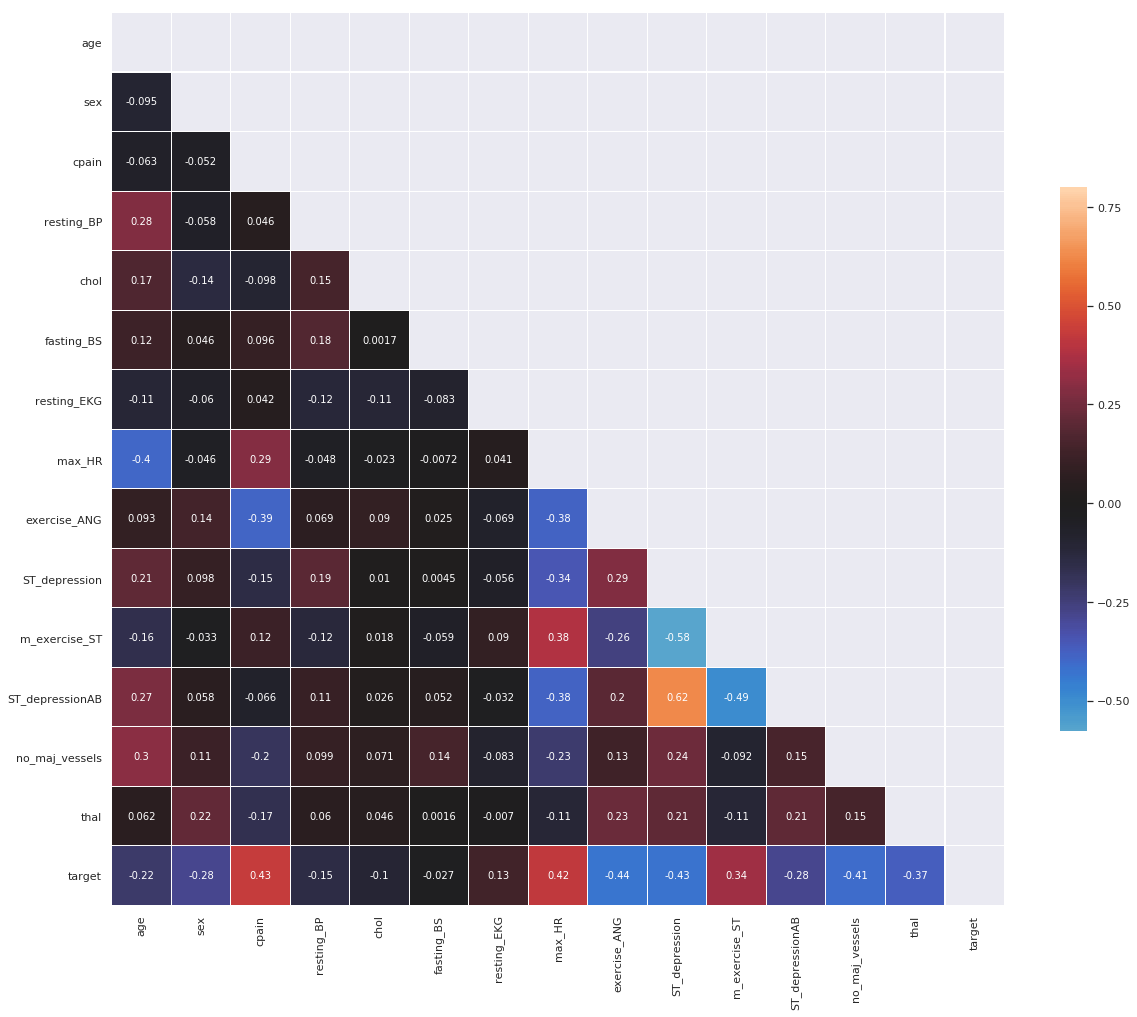

In [358]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 
plt.figure(figsize=(20,20))
sns.heatmap(heart2.corr(),vmax=.8, center=0,
            square=True, linewidths=.1, mask=mask, cbar_kws={"shrink": .5},annot=True)

In [359]:
heart2.corr()

,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,ST_depressionAB,no_maj_vessels,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.174869,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.271071,0.302261,0.062142,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.135116,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.058440,0.113060,0.216712,-0.283609
cpain,-0.063107,-0.051740,1.000000,0.046486,-0.097816,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.065688,-0.195356,-0.172656,0.432080
resting_BP,0.283121,-0.057647,0.046486,1.000000,0.145105,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.106105,0.099248,0.060093,-0.146269
chol,0.174869,-0.135116,-0.097816,0.145105,1.000000,0.001749,-0.108131,-0.023477,0.089834,0.010348,0.018076,0.026061,0.071139,0.045649,-0.100950
fasting_BS,0.119492,0.046022,0.096018,0.178125,0.001749,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.051692,0.144935,0.001583,-0.026826
resting_EKG,-0.111590,-0.060351,0.041561,-0.115367,-0.108131,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.032375,-0.083112,-0.007011,0.134874
max_HR,-0.395235,-0.046439,0.293367,-0.048023,-0.023477,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.379577,-0.228311,-0.111883,0.419955
exercise_ANG,0.093216,0.143460,-0.392937,0.068526,0.089834,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.197761,0.125377,0.232261,-0.435601
ST_depression,0.206040,0.098322,-0.146692,0.194600,0.010348,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.623477,0.236560,0.208399,-0.429146


Let's look more specifically at the correlations between the features and the target. 

The following dataframe is organized in descending order of the absolute value of the correlation between the feature and the target.

In [360]:
corre=heart2.corr()
TargetCorr=corre.loc[:'thal','target']
TargetCorr=pd.DataFrame(TargetCorr)
TargetCorr['AbsVal']=TargetCorr['target'].apply(lambda row: abs(row))
TargetCorr['Rank']=pd.DataFrame.rank(TargetCorr['AbsVal'])
TargetCorr['Feature']=TargetCorr.index
TargetCorr = TargetCorr.set_index('Rank') 
TargetCorr = TargetCorr.sort_index(ascending=0)
TargetCorr = TargetCorr.set_index('Feature') 
TargetCorr=TargetCorr.loc[:,'target']
TargetCorr=pd.DataFrame(TargetCorr)
TargetCorr.columns=["Correlation with Target"]
TargetCorr

,Correlation with Target
Feature,
exercise_ANG,-0.435601
cpain,0.432080
ST_depression,-0.429146
max_HR,0.419955
no_maj_vessels,-0.408992
thal,-0.367897
m_exercise_ST,0.343940
sex,-0.283609
ST_depressionAB,-0.280851


### <a id=''>Paired T-Test</a>

I am only going to run the paired T-Test on the quantitative features.  As the discrete feautes have, at maximum, 5 discrete values, comparing their means would not provide meaningful information.  

In [361]:
PHD=heart2.loc[heart2.loc[:,"target"]==1]
AHD=heart2.loc[heart2.loc[:,"target"]==0]

from scipy.stats import ttest_ind
def rowz(ttest): 
    name=ttest_ind(PHD[ttest], AHD[ttest])
    name=list(name)
    name = pd.DataFrame(np.array(name))
    name=name.T
    col=["t-statistic", "p_value"]
    name.columns=col
    return name

AGE=rowz('age')
AGE.loc[:,"Names"]="Age"
RESTING_BP=rowz('resting_BP')
RESTING_BP.loc[:,"Names"]="Resting_BP"
CHOLESTEROL=rowz('chol')
CHOLESTEROL.loc[:,"Names"]="Cholesterol"
MAX_HR=rowz('max_HR')
MAX_HR.loc[:,"Names"]="Max_HR"
ST_DEP=rowz('ST_depression')
ST_DEP.loc[:,"Names"]="ST_Depression"

PVALS = pd.concat([AGE, RESTING_BP,CHOLESTEROL,MAX_HR, ST_DEP], axis=0)
PVALS=PVALS.set_index(PVALS["Names"])
P_VALS= PVALS.drop('Names',axis=1)

P_VALS

,t-statistic,p_value
Names,,
Age,-3.933766,1.039484e-04
Resting_BP,-2.560991,1.092654e-02
Cholesterol,-1.757486,7.985488e-02
Max_HR,8.014848,2.476146e-14
ST_Depression,-8.229334,5.814567e-15


As we can see, almost all of the p-values are significant (<0.05).
* ST_Depression: 0.000000000000005815
* Maximum Heart Rate: 0.00000000000002476
* Age: 0.001039
* Resting Blood Pressure: 0.010927

The only non-significant p-value is cholesterol (0.07985).


This means that for ST depression, maximum heart rate, age, and resting blood pressure there is less than a 5% chance that the differences between the target sample^ means could have occured by chance  alone.
   
   ^ Target Sample: Absence or presence of heart disease


For more in-depth bivariate analysis, please go to [Part 1](https://www.kaggle.com/maurerm/kaggleproject-part-1-exploratory-data-analysis) of this Kaggle Assignment.

## <a id='2.5'>2.5. Multivariate analysis</a> 

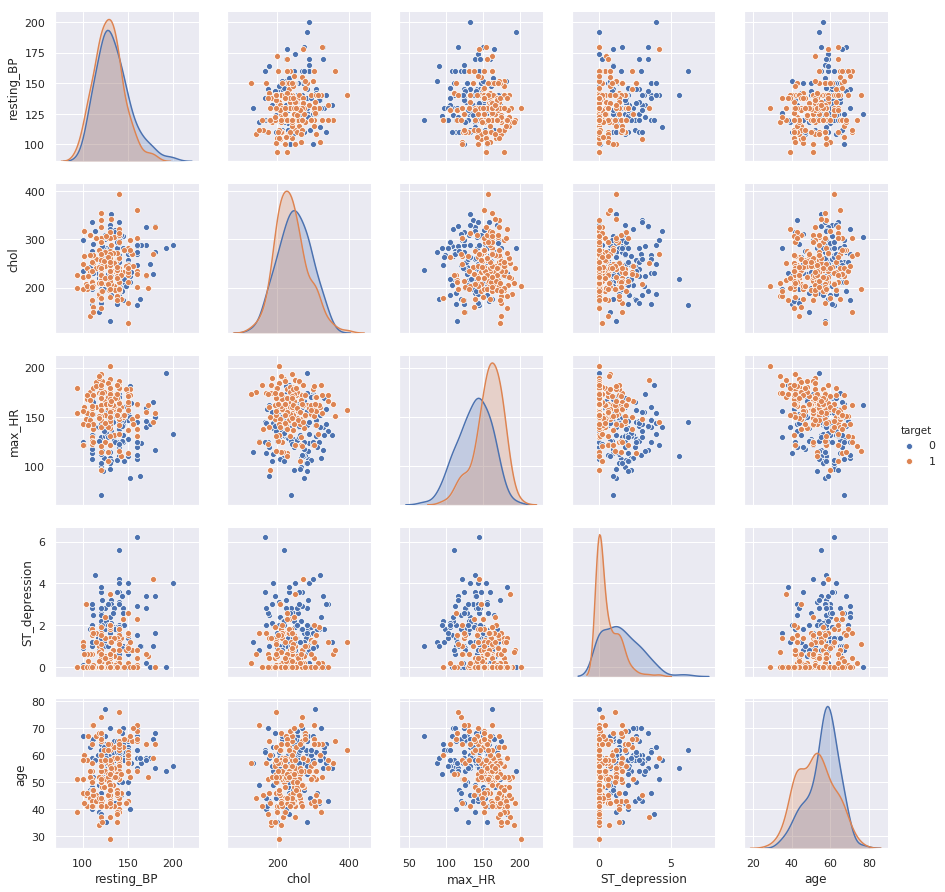

In [362]:
sns.pairplot(heart2,vars = ['resting_BP', 'chol','max_HR','ST_depression', 'age'],hue='target')

## <a id='3'>3. Predictive Modeling</a> 

## <a id='3.1'>3.1. K-Nearest Neighbors</a> 

In [Part 2](https://www.kaggle.com/maurerm/kaggleproject-part-2-modeling) of this Kaggle Assignment I tested 6 predictive models Logisitic Regression, K-Nearest Neighbors, Decision Tree, AdaBoost with a Decision Tree Base, and XGBoost).

I am first examining K-Nearest Neighbors because the model fitted by GridSearchCV had high measures of accuracy, even in the face of cross validation.  

In [363]:
#seperate independent (feature) and dependent (target) variables
#KNN cannot process text/ categorical data unless they are be converted to numbers
#For this reason I did not input the heart3 DataFrame created above
X=heart2.drop('target',1)
y=heart2.loc[:,'target']

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y,test_size=.2,random_state=40)

#Call classifier and, using GridSearchCV, find the best parameters
knn = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}
modelKNN = GridSearchCV(knn,params,cv=10)
modelKNN.fit(X_train,y_train)
modelKNN.best_params_   

#Use the above model (modelKNN) to predict the y values corresponding to the X testing set
predictKNN = modelKNN.predict(X_test)

#Compare the results of the model's predictions (predictKNN) to the actual y values
accscoreKNN=accuracy_score(y_test,predictKNN)
print('Accuracy Score: ',accuracy_score(y_test,predictKNN))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predictKNN),5)*100,'%')

Accuracy Score:  0.9344262295081968
Using k-NN we get an accuracy score of:  93.443 %


Permutation importance is a great tool for understanding the affects of features on the Machiene Learing model.  Specifically, after a model has been fit, it shuffels individual variables in the validation data and looks at their the effect on accuracy. 

In [364]:
perm = PermutationImportance(modelKNN).fit(X_test, y_test)
eli=eli5.show_weights(perm, feature_names = X.columns.tolist())
eli

Weight,Feature
0.0984 ± 0.0415,no_maj_vessels
0.0623 ± 0.0482,thal
0.0557 ± 0.0262,cpain
0.0459 ± 0.0321,ST_depression
0.0393 ± 0.0161,m_exercise_ST
0.0393 ± 0.0262,exercise_ANG
0.0295 ± 0.0245,max_HR
0.0295 ± 0.0435,sex
0.0230 ± 0.0262,age
0.0197 ± 0.0245,chol


Let's take a closer look at the numerical features using a Partial Dependence Plot. 

These plots change a single variable in a single row across a range of values and calculate the effect those changes have on the outcome. It does this for several rows and plots the average effect.

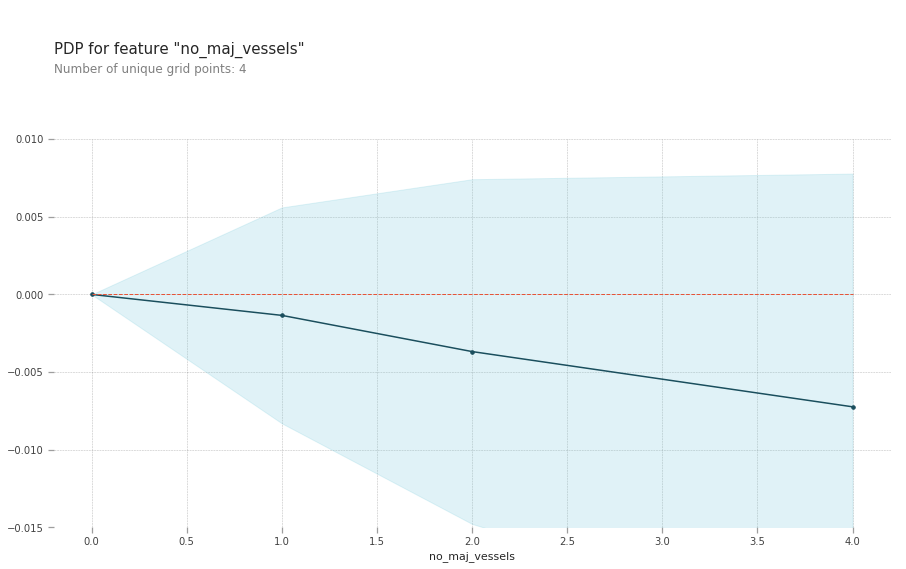

In [365]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=.2)
X_test=pd.DataFrame(X_test)
X_test

base_features = X.columns.values.tolist()

feat_name = 'no_maj_vessels'

pdp_dist = pdp.pdp_isolate(model=modelKNN, dataset=X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.ylim(-0.015,0.01)
#plt.xticks(np.arange(0, 4, step=1))
plt.show()

So as the number of major blood vessels increases, the probability of heart disease decreases. 

That makes sense, as the more major blood vessels that are colored indicates more bloodflow to the heart. 
However, the blue confidence are very large and show that this might not be true.

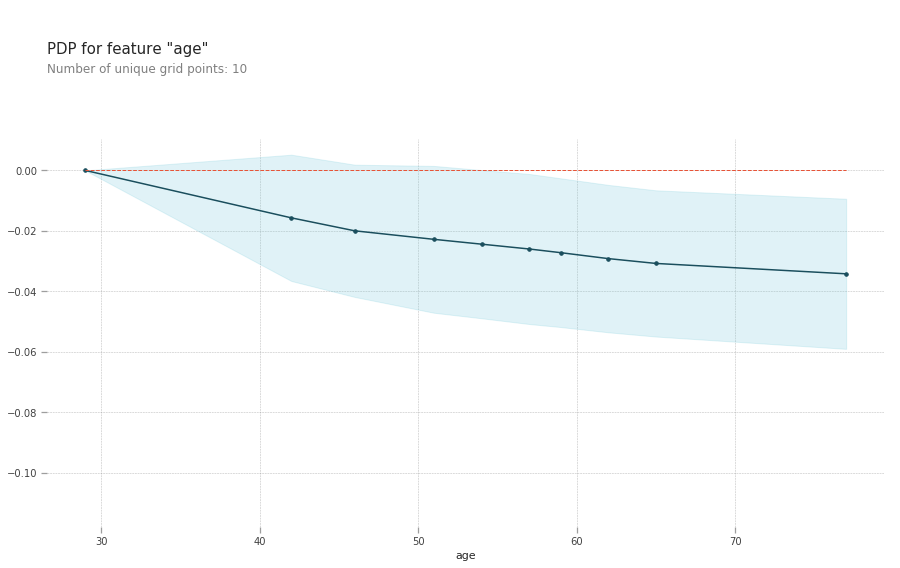

In [366]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=.2)
X_test=pd.DataFrame(X_test)
X_test

base_features = X.columns.values.tolist()

feat_name = 'age'

pdp_dist = pdp.pdp_isolate(model=modelKNN, dataset=X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
#plt.ylim(-0.025,0.01)
#plt.xticks(np.arange(0, 4, step=1))
plt.show()

Interestingly, it appears as if the likelyhood of Heart Disease goes down with age.  I wonder why. 

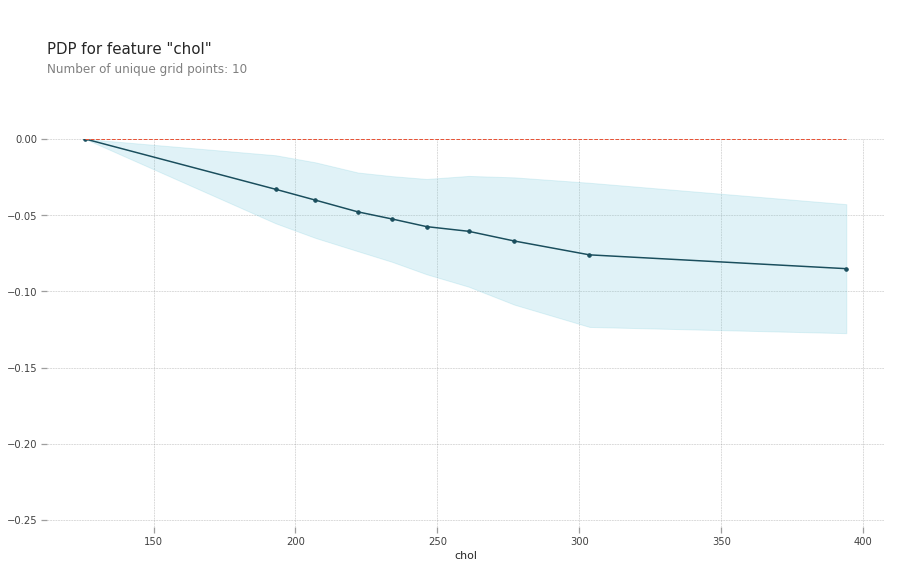

In [367]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=.2)
X_test=pd.DataFrame(X_test)
X_test

base_features = X.columns.values.tolist()

feat_name = 'chol'

pdp_dist = pdp.pdp_isolate(model=modelKNN, dataset=X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
#plt.ylim(-0.025,0.01)
#plt.xticks(np.arange(0, 4, step=1))
plt.show()

Interestingly, it appears as if the likelyhood of Heart Disease goes down with cholesterol levels.  Hmm...

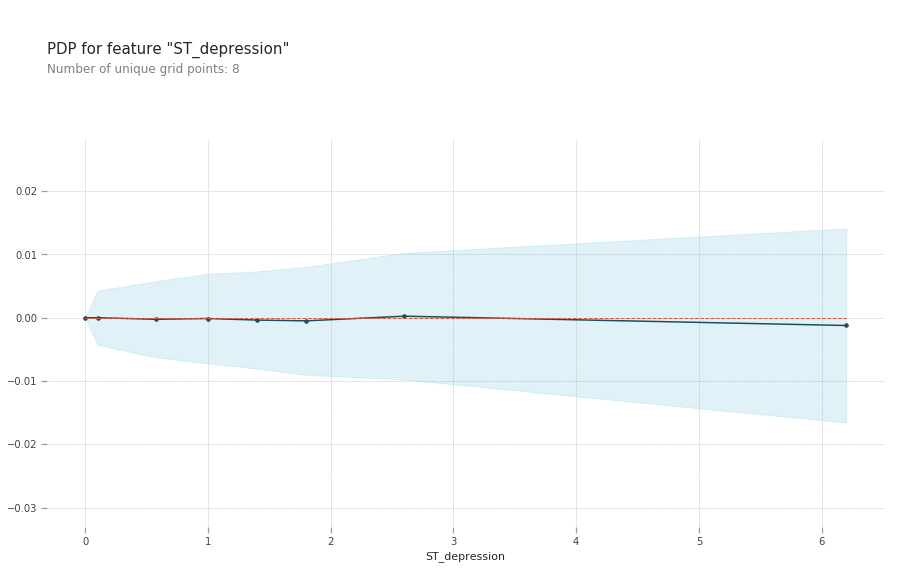

In [368]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=.2)
X_test=pd.DataFrame(X_test)
X_test

base_features = X.columns.values.tolist()

feat_name = 'ST_depression'

pdp_dist = pdp.pdp_isolate(model=modelKNN, dataset=X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
#plt.ylim(-0.025,0.01)
#plt.xticks(np.arange(0, 4, step=1))
plt.show()

ST_depression doesn't seem to affect the liklihood of Heart Disease.  

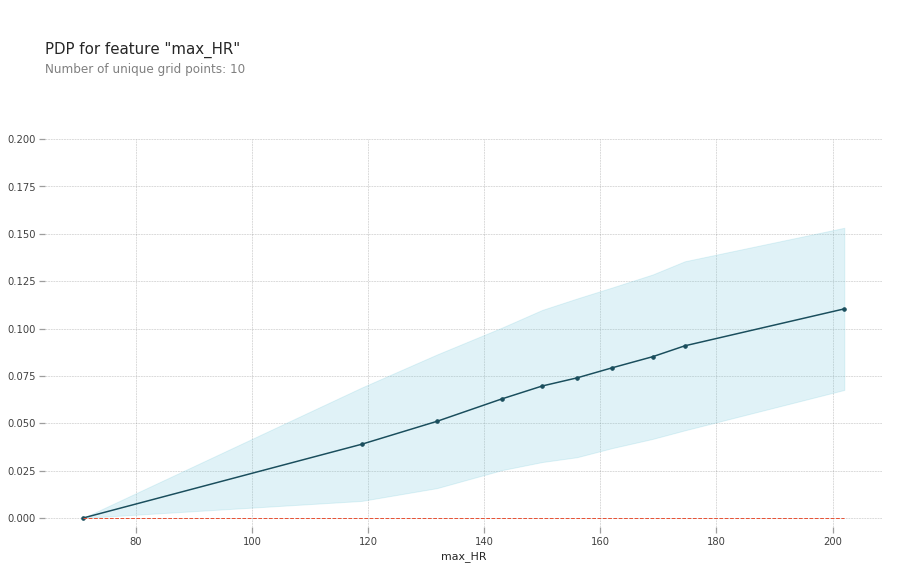

In [369]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=.2)
X_test=pd.DataFrame(X_test)
X_test

base_features = X.columns.values.tolist()

feat_name = 'max_HR'

pdp_dist = pdp.pdp_isolate(model=modelKNN, dataset=X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.ylim(-0.005,0.2)
#plt.xticks(np.arange(0, 4, step=1))
plt.show()

It appears that as the maximum heart rate increases, so does the likelihood of a Heart Disease diagnosis. 

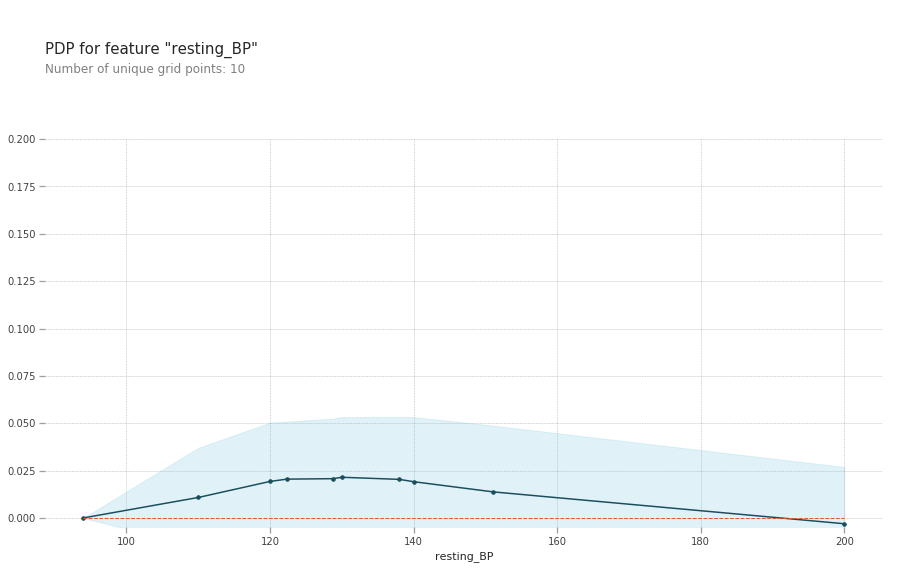

In [370]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=.2)
X_test=pd.DataFrame(X_test)
X_test

base_features = X.columns.values.tolist()

feat_name = 'resting_BP'

pdp_dist = pdp.pdp_isolate(model=modelKNN, dataset=X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.ylim(-0.005,0.2)
#plt.xticks(np.arange(0, 4, step=1))
plt.show()

Resting Blood Pressure also doesn't give a lot of weight to this model, but it dose appear that the lowest likelihood of Heart Disease is from 120-140 systolic blood pressure, which is still high.  But the more extreme values seem more, albiet slighlty, associated with Heart Disease. 

## <a id='3.2'>3.2. Random Forest</a> 

I am using Random Forest because my model in [Part 2](https://www.kaggle.com/maurerm/kaggleproject-part-2-modeling) of this Kaggle Assignment had decent accuracy values and because the Random Forest has the ability to rank the important.  In fact, Random Forests are often used for feature selection in a data science workflow.

In [374]:
X= heart2.drop('target',1)
y= heart2['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=.3,random_state=40)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)



In [375]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ST_depression      0.143820
cpain              0.133519
max_HR             0.120092
age                0.103251
no_maj_vessels     0.094951
thal               0.092678
resting_BP         0.088406
chol               0.074195
m_exercise_ST      0.037664
sex                0.033832
exercise_ANG       0.028396
resting_EKG        0.023374
ST_depressionAB    0.016786
fasting_BS         0.009037
dtype: float64

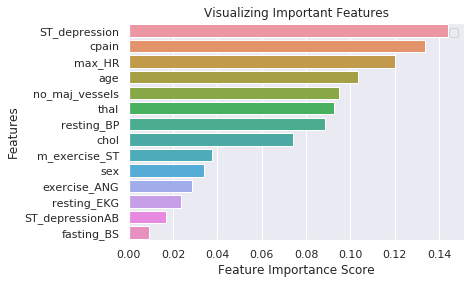

In [376]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()                 

# <a id='4'>4. Conclusions</a> 

* Data indicates that as the number of major blood vessels increases, the probability of heart disease decreases. However, the blue confidence intervals are quite large, so this may not be accurate. 
* There appears that the likelyhood of a Heart Disease diagnosis goes down as age and cholesterol increase.
* According to the Partial Dependence Plot, ST depression doesn't seem to affect the liklihood of Heart Disease.  However, it is ranked high as an important feature using the Random Forest model.
* It appears that as the maximum heart rate increases, so does the likelihood of a Heart Disease diagnosis. 
* Interestingly, it dose appear that the lowest likelihood of Heart Disease is from 120-140 systolic blood pressure, which is still high.  But the more extreme values seem more, albiet slighlty, associated with Heart Disease.  